<a href="https://colab.research.google.com/github/kamzon/auto-encoder/blob/main/auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
from matplotlib import pyplot as plt 
import math


In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:

image_size=train_images.shape[1]
train_images=np.reshape(train_images,[-1,image_size,image_size,1])
test_images=np.reshape(test_images,[-1,image_size,image_size,1])

train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

#image avec noise

noise=np.random.normal(loc=0, scale=0.1, size=train_images.shape)
train_images_noisy=train_images + noise/10

noise=np.random.normal(loc=0, scale=0.1, size=test_images.shape)
test_images_noisy=test_images + noise/10










In [ ]:
noise

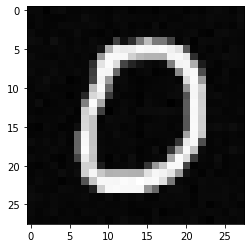

In [ ]:
plt.imshow(test_images_noisy[10].reshape(28,28),cmap='gray')

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import keras.layers
from keras.layers import Conv2DTranspose, Reshape
from keras.layers import Activation, Dense


In [ ]:


#encoder:
autoencoder_model=Sequential()
autoencoder_model.add(Conv2D(64,kernel_size=5,strides=2,activation='relu',input_shape=(28,28,1),padding='same'))
autoencoder_model.add(Conv2D(32,kernel_size=5,strides=2, activation='relu',padding='same'))
autoencoder_model.add(Flatten())
autoencoder_model.add(Dense(16))
#autoencoder_model.add(Conv2D(64,kernel_size=5,strides=2,activation='relu',padding='same'))




In [ ]:
#decoder
autoencoder_model.add(Dense(1568))
autoencoder_model.add(Reshape((7,7,32)))
autoencoder_model.add(Conv2DTranspose(32,kernel_size=5,strides=2,activation='relu',padding='same'))

autoencoder_model.add(Conv2DTranspose(64,kernel_size=5,strides=2,activation='relu',padding='same'))

#autoencoder_model.add(Conv2DTranspose(16,kernel_size=5,strides=2,activation='relu',padding='same'))

autoencoder_model.add(Conv2DTranspose(1,kernel_size=5,padding='same'))

autoencoder_model.add(Activation('sigmoid'))


In [ ]:
autoencoder_model.compile(loss='mse',optimizer='adam')

In [ ]:
autoencoder_model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 32)          51232     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                25104     
_________________________________________________________________
dense_17 (Dense)             (None, 1568)              26656     
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_66 (Conv2DT (None, 14, 14, 32)      

In [ ]:
autoencoder_train=autoencoder_model.fit(train_images_noisy,train_images, batch_size=32,nb_epoch=10,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0197
Epoch 2/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0096
Epoch 3/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0085
Epoch 4/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0079
Epoch 5/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0075
Epoch 6/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0072
Epoch 7/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0070
Epoch 8/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0068
Epoch 9/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0067
Epoch 10/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.0066


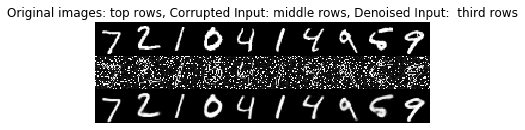

In [ ]:
from PIL import Image


# Prediction the Autoencoder output -- test images
x_decoded = autoencoder_model.predict(test_images_noisy)

image_size = train_images.shape[1]
rows, cols = 1, 10
num = rows * cols
imgs = np.concatenate([test_images[:num], test_images_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

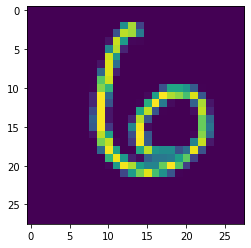

In [ ]:
plt.imshow(test_images[100].reshape(28,28))



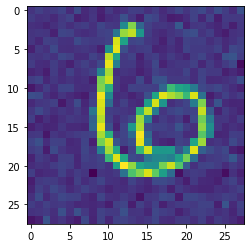

In [ ]:
plt.imshow(test_images_noisy[100].reshape(28,28))


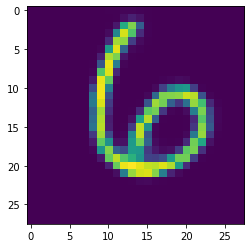

In [ ]:
plt.imshow(x_decoded[100].reshape(28,28))